<h1>Simple Linear Regression From Scratch</h1>

In [2]:
import numpy as np 
import pandas as pd 

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('../../Datasets/canada_per_capita_income.csv')

In [7]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


<h3>1. Read Data

In [27]:
df = np.genfromtxt(r"../../Datasets/canada_per_capita_income.csv", delimiter=',')
iterations = 100

In [28]:
df.shape

(48, 2)

In [85]:
x = np.array(df[1:,[0]])
y = np.array(df[1:,[1]])

In [86]:
x.shape

(47, 1)

In [87]:
y.shape

(47, 1)

In [88]:
y

array([[ 3399.299037],
       [ 3768.297935],
       [ 4251.175484],
       [ 4804.463248],
       [ 5576.514583],
       [ 5998.144346],
       [ 7062.131392],
       [ 7100.12617 ],
       [ 7247.967035],
       [ 7602.912681],
       [ 8355.96812 ],
       [ 9434.390652],
       [ 9619.438377],
       [10416.53659 ],
       [10790.32872 ],
       [11018.95585 ],
       [11482.89153 ],
       [12974.80662 ],
       [15080.28345 ],
       [16426.72548 ],
       [16838.6732  ],
       [17266.09769 ],
       [16412.08309 ],
       [15875.58673 ],
       [15755.82027 ],
       [16369.31725 ],
       [16699.82668 ],
       [17310.75775 ],
       [16622.67187 ],
       [17581.02414 ],
       [18987.38241 ],
       [18601.39724 ],
       [19232.17556 ],
       [22739.42628 ],
       [25719.14715 ],
       [29198.05569 ],
       [32738.2629  ],
       [36144.48122 ],
       [37446.48609 ],
       [32755.17682 ],
       [38420.52289 ],
       [42334.71121 ],
       [42665.25597 ],
       [426

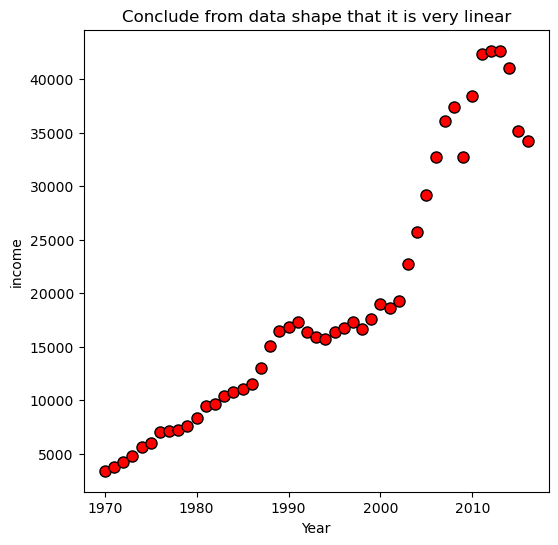

In [89]:
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro',ms=8,mec='k')
plt.title('Conclude from data shape that it is very linear')
plt.xlabel('Year')
plt.ylabel('income')
plt.grid(False)

<h3>2. Predictive Line</h3>
- mx + b <hr>
- add bias to m so we get (m | b) matrix -> Theta so theta is a matrix that contains all params<hr>
- add 1s col to x to be able to apply multiplication with theta as it has the bias col -> (x | 1)<hr>
- on multiplication we apply theta.Transpose to have correct dimensions to multiply mxn . nxp

In [90]:
#this function is given the parameters m and b as an np.array([m,b]) which is theta
def predictive_line (x,theta):
    Predictions = None
    x_bias = np.hstack((np.ones((x.shape[0], 1)), x))
    Predictions = np.dot(theta.T, x_bias.T)
    Predictions = Predictions.T
    return Predictions

In [91]:
P = predictive_line(x, theta = np.array([1000,17]).reshape((2,1)))
print (P[:5])

[[34490.]
 [34507.]
 [34524.]
 [34541.]
 [34558.]]


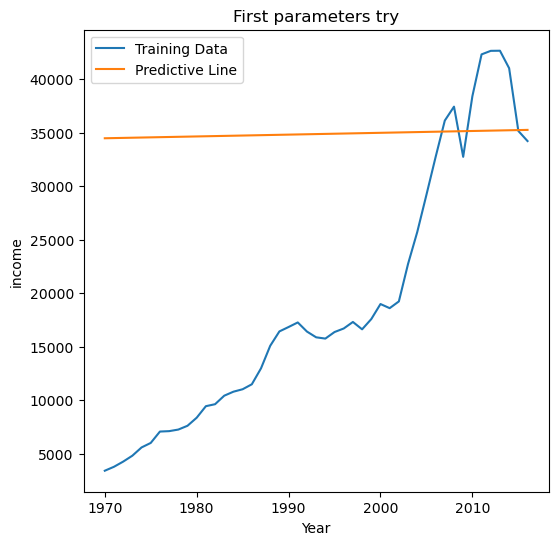

In [92]:
plt.figure(figsize=(6,6))
plt.plot(x,y, ms=8, mec='k')
plt.title('First parameters try')
plt.xlabel('Year')
plt.ylabel('income')
plt.grid(False)
plt.plot(x,P,'-')
plt.legend(['Training Data', 'Predictive Line'])

In [93]:
P = predictive_line(x, theta = np.array([20,17]).reshape((2,1)))
print (P[:5])

[[33510.]
 [33527.]
 [33544.]
 [33561.]
 [33578.]]


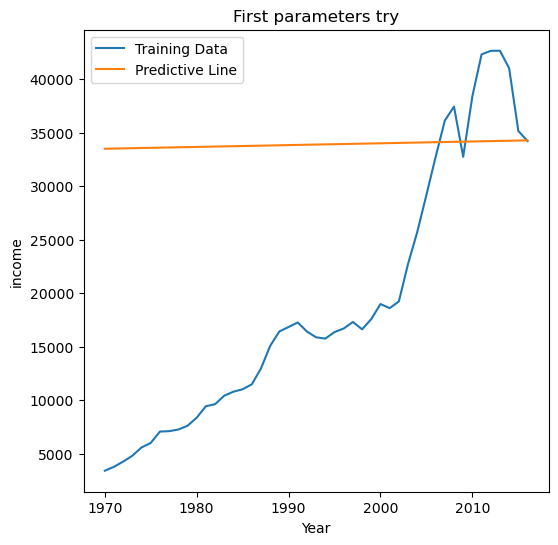

In [94]:
plt.figure(figsize=(6,6))
plt.plot(x,y, ms=8, mec='k')
plt.title('First parameters try')
plt.xlabel('Year')
plt.ylabel('income')
plt.grid(False)
plt.plot(x,P,'-')
plt.legend(['Training Data', 'Predictive Line'])

<h3>3. Cost Function</h3>

The cost function for linear regression is called the **Mean Squared Error (MSE)**, and it measures the average squared difference between the predicted and actual values:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

In [77]:
def calculate_cost(x,theta,y):
    m = y.shape[0]
    J = 0
    P = predictive_line(x,theta)
    J = 1/(2*m) * np.sum(((P - y)**2), axis=0)
    return J

In [95]:
print('first try cost:')
print(calculate_cost(x=x, theta = np.array([1000,17]).reshape((2,1)), y=y))
print('second try cost:')
print(calculate_cost(x=x, theta = np.array([20,17]).reshape((2,1)), y=y))

first try cost:
[1.95685695e+08]
second try cost:
[1.80524249e+08]


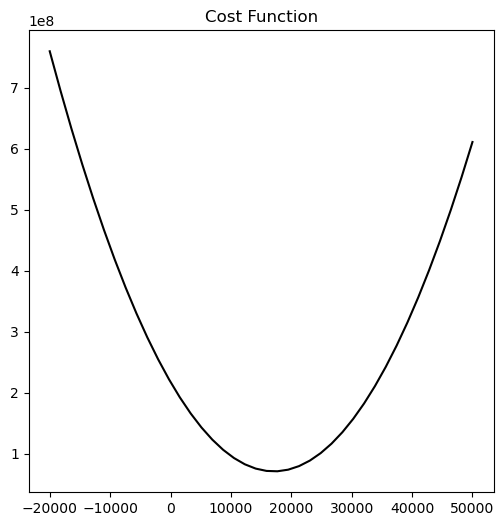

In [116]:
theta0_grid = np.linspace(-20000,50000,num=40)
theta1_grid = np.ones(len(theta0_grid)) * 0.9
theta0_grid = theta0_grid.reshape((theta0_grid.shape[0], -1))
theta1_grid = theta1_grid.reshape((theta0_grid.shape[0], -1))
theta = np.append(theta0_grid,theta1_grid, axis=1)
Jgrid = calculate_cost(x=x, theta = theta.T, y=y)
plt.figure(figsize=(6,6))
plt.plot(theta0_grid, Jgrid, 'k')
plt.title('Cost Function')
plt.grid(False)

In [125]:
P = predictive_line(x, theta = np.array([11000,3]).reshape((2,1)))
print (P[:5])

[[16910.]
 [16913.]
 [16916.]
 [16919.]
 [16922.]]


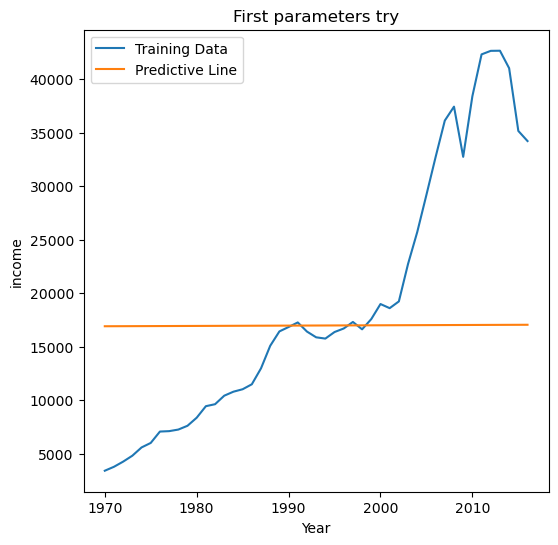

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x,y, ms=8, mec='k')
plt.title('First parameters try')
plt.xlabel('Year')
plt.ylabel('income')
plt.grid(False)
plt.plot(x,P,'-')
plt.legend(['Training Data', 'Predictive Line'])

<h3>4. Gradient Descent</h3>


$$
\theta = \theta - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m}(P(x) - y)X^T
$$

$$
\alpha \ is\ the\ learning\ rate\
$$

In [144]:
def Gradient_Descent (x, y, theta, alpha, num_iters):
    m = y.shape[0]
    print(theta.shape)

    x1 = np.hstack((np.ones((x.shape[0], 1)), x))
    for i in range (num_iters):
        p = predictive_line(x, theta.T)
        theta = theta - ( (alpha/m) * np.sum(p-y) * (x1) )

    return theta

In [145]:
theta = Gradient_Descent(x,y,theta = np.array([11000,3]).reshape((2,1)).T, alpha=0.0001, num_iters=100)
P = predictive_line(x, theta.T)
cost = calculate_cost(x,theta.T, y)

print ('Theta = '+str(theta))
print ('Cost = '+ str(cost))

(1, 2)
Theta = [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
Cost = [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


C:\Users\Malak\AppData\Local\Temp\ipykernel_21160\1347531724.py:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ( (alpha/m) * np.sum(p-y) * (x1) )


<h3>5. Normal Equation</h3>

$$
\theta = (X^T X)^{-1} X^T y
$$

In [143]:
from scipy import linalg

In [146]:
def Normal_Equation(x,y):
    x1 = np.hstack((np.ones((x.shape[0], 1)), x))
    theta = linalg.inv(x1.T.dot(x1)).dot(x1.T).dot(y).T
    return theta

In [147]:
theta = Normal_Equation(x,y)
theta = theta.reshape((2,1))
P = predictive_line(x, theta)
cost = calculate_cost(x, theta, y)

print ('Theta = '+str(theta))
print ('Cost = '+ str(cost))

Theta = [[-1.63221076e+06]
 [ 8.28465075e+02]]
Cost = [7731369.53075234]


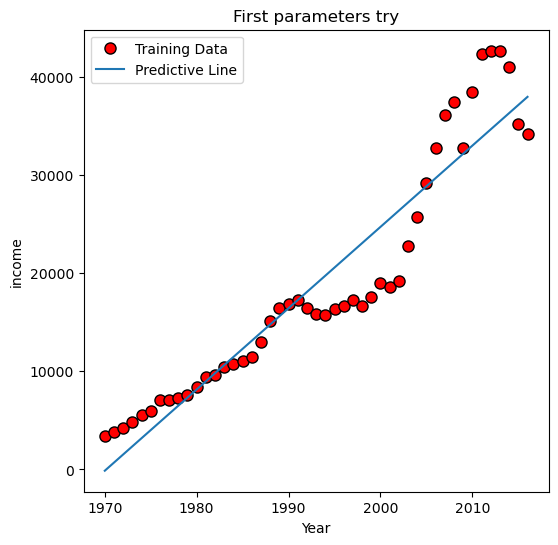

In [148]:
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro', ms=8, mec='k')
plt.title('First parameters try')
plt.xlabel('Year')
plt.ylabel('income')
plt.grid(False)
plt.plot(x,P,'-')
plt.legend(['Training Data', 'Predictive Line'])